In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as sa
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract


In [3]:
Base = automap_base()

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
Measurement = Base.classes.measurement
Station =  Base.classes.station

In [7]:
session = Session(engine)
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [8]:
jun = []
jun = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)=='06').all()

In [9]:
df = pd.DataFrame(jun, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

In [10]:
dec = []
dec = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)=='12').group_by('date').all()


In [11]:
df2 = pd.DataFrame(dec, columns=['date','precipitation'])
df2.set_index(df2['date'], inplace=True)
df = df.sort_index()


In [12]:
df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [13]:
df2.describe()

,precipitation
count,214.000000
mean,0.112383
std,0.454108
min,0.000000
25%,0.000000
50%,0.000000
75%,0.040000
max,4.940000


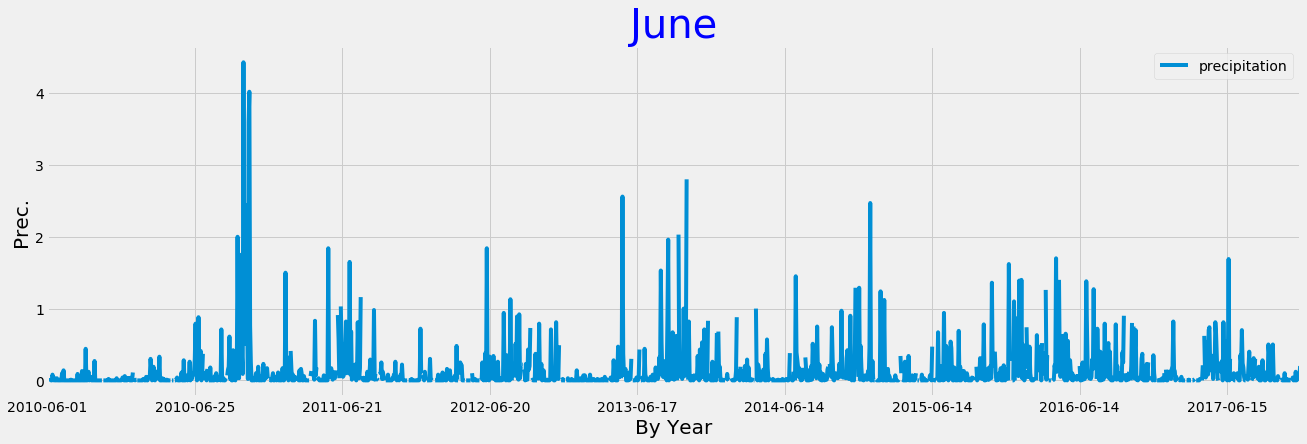

In [14]:
style.use('fivethirtyeight')
lineplot = df.plot(figsize=(20,6))
plt.title("June", fontsize=40,color="blue")
plt.ylabel("Prec.", fontsize=20)
plt.xlabel("By Year", fontsize=20)
plt.savefig("june_precipitation.png")
plt.show()

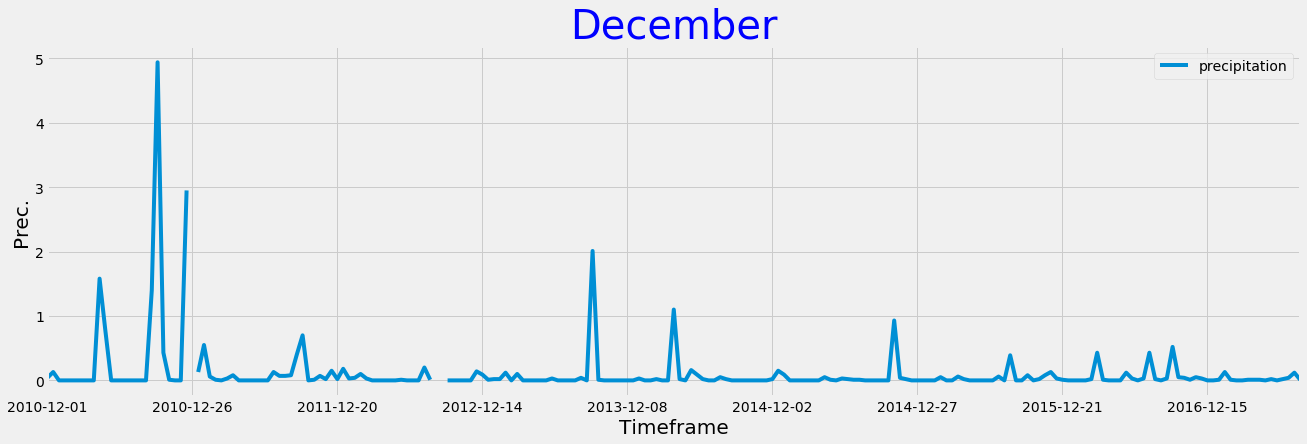

In [15]:
style.use('fivethirtyeight')
lineplot = df2.plot(figsize=(20,6))
plt.title("December", fontsize=40,color="blue")
plt.ylabel("Prec.", fontsize=20)
plt.xlabel("Timeframe", fontsize=20)
plt.savefig("dec_precipitation.png")
plt.show()

# Exploratory Climate Analysis

In [16]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

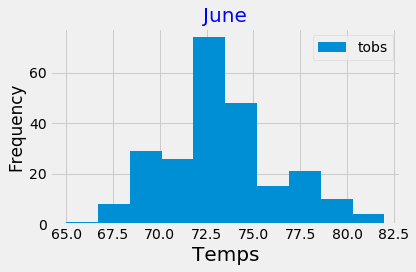

In [21]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month', Measurement.date)=='06').all()
df = pd.DataFrame(results, columns=['tobs'])

df.plot.hist(bins=10)
plt.title("June", fontsize=20,color="blue")
plt.xlabel("Temps", fontsize=20)
plt.savefig("june_tobs.png")
plt.tight_layout()

In [22]:
df.describe()

,tobs
count,236.000000
mean,73.271186
std,2.989801
min,65.000000
25%,71.000000
50%,73.000000
75%,75.000000
max,82.000000


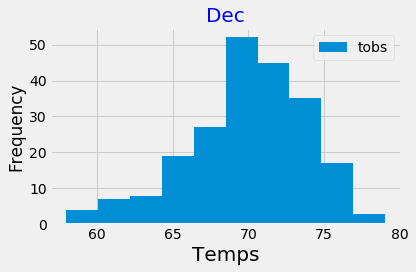

In [18]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month', Measurement.date)=='12').all()

df = pd.DataFrame(results, columns=['tobs'])

df.plot.hist(bins=10)
plt.title("Dec", fontsize=20,color="blue")
plt.xlabel("Temps", fontsize=20)
plt.savefig("dec_tobs.png")
plt.tight_layout()

In [20]:
df.describe()

,tobs
count,217.000000
mean,69.903226
std,3.803609
min,58.000000
25%,68.000000
50%,70.000000
75%,73.000000
max,79.000000
